# Run SAS in Jupyter Notebooks with SASpy

 ## Installation


    1.	Python3.4 or higher.
    2.  Install SASPY using a Python PIP command on the client (check https://sassoftware.github.io/saspy/install.html#the-authinfo-file-authinfo-on-windows ):    
        pip install saspy
    3.	requires Java 7 or higher on the client.
    4.	register on the SAS On Demand website, https://www.sas.com/en_us/software/on-demand-for-academics.html
    5.	create two files (check https://support.sas.com/ondemand/saspy.html ) :
        A. Create sasacfg_personal.py; Save sascfg_personal.py to your SASPy installation location.

In [1]:
# where to save your sascfg_personal.py file
import saspy, os
print(saspy.__file__.replace('__init__.py', 'sascfg_personal.py'))

C:\Users\avitr\anaconda3\lib\site-packages\saspy\sascfg_personal.py


        B. Create _authinfo; Save _authinfo to your user's home directory C:\Users\'YOUR_USERNAME' on Windows.

In [2]:
# Check Python version
from platform import python_version
python_version()

'3.8.8'

In [3]:
# Check Java version
import subprocess
print (subprocess.check_output(["java", "-version"], stderr=subprocess.STDOUT) )

b'java version "1.8.0_333"\r\nJava(TM) SE Runtime Environment (build 1.8.0_333-b02)\r\nJava HotSpot(TM) Client VM (build 25.333-b02, mixed mode, sharing)\r\n'


In [4]:
# check the version of SASPy
saspy.__version__

'4.3.0'

### Submit the SASsession object to get info about your session

In [5]:
# Start a SAS session, SAS is running in UTF-8
import saspy
sas = saspy.SASsession()
sas

Using SAS Config named: oda
SAS Connection established. Subprocess id is 7316



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = C:\Users\avitr\anaconda3\lib\site-packages\saspy\sascfg_personal.py
WORK Path             = /saswork/SAS_workA77E00019655_odaws02-usw2-2.oda.sas.com/SAS_work7BFD00019655_odaws02-usw2-2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 4.3.0
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 104021


In [6]:
# Check assinged libraries
assigned_librefs = sas.assigned_librefs() # Check all assigned libraries
print(assigned_librefs)

['WORK', 'SASDATA', 'STPSAMP', 'SASHELP', 'MAPS', 'MAPSSAS', 'MAPSGFK', 'SASUSER']


### Create a SASdata object to use to access the cars data set in the sashelp library.

In [7]:
# Get SAS cars dataset
cars = sas.sasdata(table='cars',libref='sashelp', results='text')

In [8]:
type(cars)

saspy.sasdata.SASdata

#####  equivalent of SAS ccde:

    data cars;
     set sashelp.cars;
     run;

#####  Run SAS Procedure

In [88]:
%%SAS sas 
proc print data=sashelp.cars; 
run;

In [85]:
# try proc sql 

sas.submitLST("proc sql;select * from sashelp.cars;quit", method='listorlog') 

In [87]:
%%SAS sas
proc sql;
select * from sashelp.cars;
quit;

In [10]:
# different style of writing and executing SAS command via saspy
sas.submitLST("proc print data=sashelp.cars; run;", method='listorlog') 

In [11]:
# use the sas.HTML method to render the LST which was returned as an HTML document
html_LST = sas.submitLST("proc print data=sashelp.cars; run;") 
sas.HTML(html_LST['LST'])

TypeError: 'NoneType' object is not subscriptable

In [12]:
# First 5 obs
cars.head()


                                                           The SAS System                   Wednesday, June  8, 2022 04:35:00 PM   2

                                       Drive                   Engine                                 MPG_
 Obs Make  Model          Type  Origin Train     MSRP  Invoice  Size  Cylinders Horsepower MPG_City Highway Weight Wheelbase Length

   1 Acura MDX            SUV    Asia  All    $36,945  $33,337   3.5      6         265       17       23    4451     106      189 
   2 Acura RSX Type S 2dr Sedan  Asia  Front  $23,820  $21,761   2.0      4         200       24       31    2778     101      172 
   3 Acura TSX 4dr        Sedan  Asia  Front  $26,990  $24,647   2.4      4         200       22       29    3230     105      183 
   4 Acura TL 4dr         Sedan  Asia  Front  $33,195  $30,299   3.2      6         270       20       28    3575     108      186 
   5 Acura 3.5 RL 4dr     Sedan  Asia  Front  $43,755  $39,014   3.5      6         225       18 


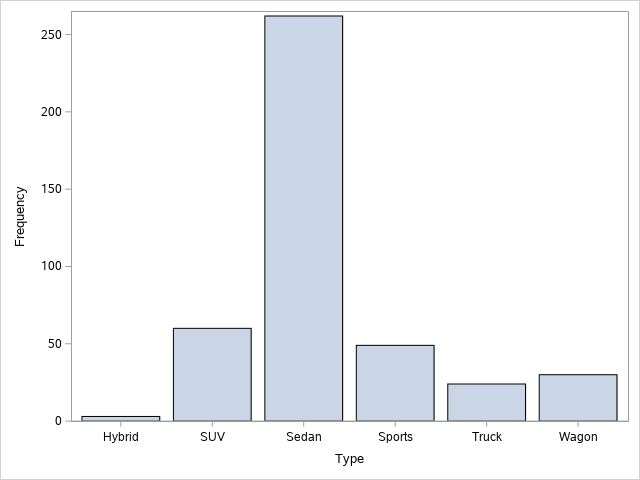

In [13]:
cars.bar('Type')


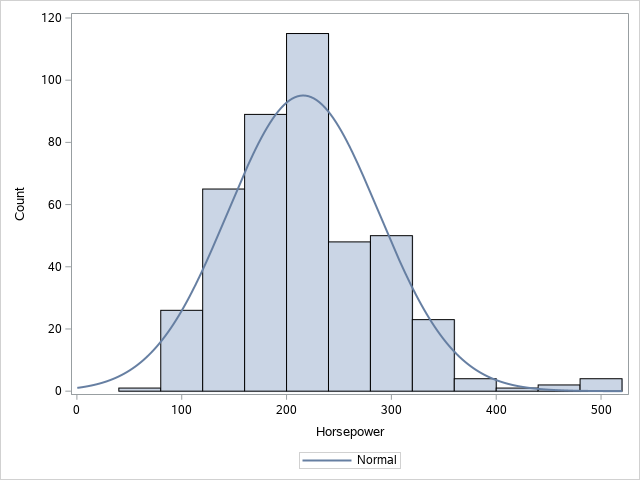

In [14]:
cars.hist('Horsepower')


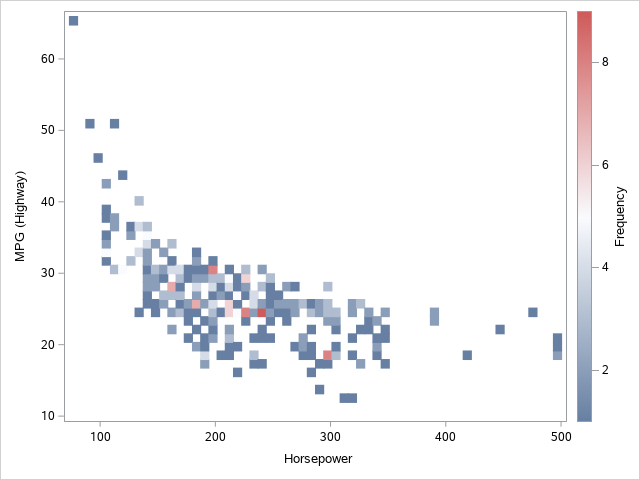

In [15]:
cars.heatmap('Horsepower','MPG_Highway')

In [16]:
# Show SAS code

sas.teach_me_SAS(True)
cars.heatmap('Horsepower','MPG_Highway')
sas.teach_me_SAS(False)

proc sgplot data=sashelp.'cars'n ;
	heatmap x='Horsepower'n y='MPG_Highway'n;;
run;
title;


In [17]:
# runs as PROC MEANS on the dataset
cars.describe()


                                                                                            Wednesday, June  8, 2022 04:35:00 PM   3

                                                        The MEANS Procedure

                                         N
Variable      Label               N   Miss         Median           Mean        Std Dev        Minimum      25th Pctl      50th Pctl
------------------------------------------------------------------------------------------------------------------------------------
MSRP                            428      0          27635          32775          19432          10280          20330          27635
Invoice                         428      0          25295          30015          17642    9875.000000          18851          25295
EngineSize    Engine Size (L)   428      0       3.000000       3.196729       1.108595       1.300000       2.350000       3.000000
Cylinders                       426      2       6.000000       5.807512       1

In [18]:
%%SAS sas
PROC MEANS DATA=sashelp.cars;
VAR _numeric_;
OUTPUT OUT=stats;
RUN;


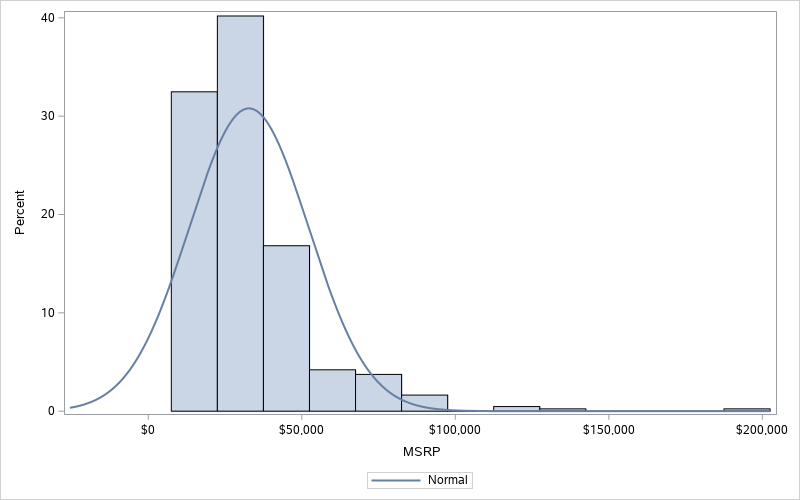

In [19]:
%%SAS sas
proc means data=sashelp.cars;
run;
ods graphics / height=500 width=800;
proc sgplot data=sashelp.cars;
histogram msrp;
density msrp;
run;

In [20]:
cars.info()

The info method only works with Pandas results


In [21]:
# Sort
cars.sort(by = 'Horsepower', out = 'cars_copy') 
print(sas.lastlog())


47                                                         The SAS System                       Wednesday, June  8, 2022 04:35:00 PM

273        ;*';*";*/;
274        data _null_; e = exist("sashelp.'cars'n");
275        v = exist("sashelp.'cars'n", 'VIEW');
276         if e or v then e = 1;
277        te='TABLE_EXISTS='; put te e;run;
TABLE_EXISTS= 1
278        
279        
280        ;*';*";*/;
281        

48                                                         The SAS System                       Wednesday, June  8, 2022 04:35:00 PM

282        
283        %put E3969440A681A2408885998500000024;
E3969440A681A2408885998500000024
284        

49                                                         The SAS System                       Wednesday, June  8, 2022 04:35:00 PM

285        ;*';*";*/;
286        proc sort data=sashelp.'cars'n  out='cars_copy'n   ;
287        by Horsepower;run
288        ;
289        
290        ;*';*";*/;
291        

50                                 

In [22]:
cars_copy = sas.sasdata(table='cars_copy',libref='work', results='text')
cars_copy.head(10)


                                                                                            Wednesday, June  8, 2022 04:35:00 PM   2

                                                                                                                M
                                                                            D                      E     H      P
                                                                            r                      n  C  o      G       W
                                                                            i                      g  y  r   M  _       h
                                                                            v                I     i  l  s   P  H       e
                                                                     O      e                n     n  i  e   G  i   W   e   L
                                       M                             r      T                v     e  n  p   _  g   e   l   e
              M    

In [23]:
# convert to pandas dataframe format

df = cars.to_df_DISK(dtype=str)
df.dtypes

Make           object
Model          object
Type           object
Origin         object
DriveTrain     object
MSRP           object
Invoice        object
EngineSize     object
Cylinders      object
Horsepower     object
MPG_City       object
MPG_Highway    object
Weight         object
Wheelbase      object
Length         object
dtype: object

In [24]:
df.head()

Make           Model   Type Origin DriveTrain   MSRP Invoice EngineSize  \
0  Acura             MDX    SUV   Asia        All  36945   33337        3.5   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  23820   21761          2   
2  Acura         TSX 4dr  Sedan   Asia      Front  26990   24647        2.4   
3  Acura          TL 4dr  Sedan   Asia      Front  33195   30299        3.2   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  43755   39014        3.5   

  Cylinders Horsepower MPG_City MPG_Highway Weight Wheelbase Length  
0         6        265       17          23   4451       106    189  
1         4        200       24          31   2778       101    172  
2         4        200       22          29   3230       105    183  
3         6        270       20          28   3575       108    186  
4         6        225       18          24   3880       115    197

In [25]:
df.describe()

Make     Model   Type Origin DriveTrain   MSRP Invoice EngineSize  \
count      428       428    428    428        428    428     428        428   
unique      38       425      6      3          3    410     425         43   
top     Toyota  C320 4dr  Sedan   Asia      Front  31545   14207          3   
freq        28         2    262    158        226      2       2         42   

       Cylinders Horsepower MPG_City MPG_Highway Weight Wheelbase Length  
count        426        428      428         428    428       428    428  
unique         7        110       28          33    348        40     67  
top            6        200       18          26   3450       107    178  
freq         190         17       69          54      4        45     27

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Make         428 non-null    object
 1   Model        428 non-null    object
 2   Type         428 non-null    object
 3   Origin       428 non-null    object
 4   DriveTrain   428 non-null    object
 5   MSRP         428 non-null    object
 6   Invoice      428 non-null    object
 7   EngineSize   428 non-null    object
 8   Cylinders    426 non-null    object
 9   Horsepower   428 non-null    object
 10  MPG_City     428 non-null    object
 11  MPG_Highway  428 non-null    object
 12  Weight       428 non-null    object
 13  Wheelbase    428 non-null    object
 14  Length       428 non-null    object
dtypes: object(15)
memory usage: 50.3+ KB


### transfer data between SAS Data Sets and Pandas Data Frames

In [27]:
# sd2df() is an alias for sasdata2dataframe()
df2 = sas.sd2df(table='cars',libref='sashelp')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    float64
 6   Invoice      428 non-null    float64
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    float64
 10  MPG_City     428 non-null    float64
 11  MPG_Highway  428 non-null    float64
 12  Weight       428 non-null    float64
 13  Wheelbase    428 non-null    float64
 14  Length       428 non-null    float64
dtypes: float64(10), object(5)
memory usage: 50.3+ KB


In [28]:
# vlist=list(df2.columns)  # Using columns with dataframe object
# vlist=list(df2.columns.values) #  column.values method returns an array of index
vlist=list(df2.columns.values.tolist()) # Using tolist() method with values with given the list of columns

vlist

['Make',
 'Model',
 'Type',
 'Origin',
 'DriveTrain',
 'MSRP',
 'Invoice',
 'EngineSize',
 'Cylinders',
 'Horsepower',
 'MPG_City',
 'MPG_Highway',
 'Weight',
 'Wheelbase',
 'Length']

In [29]:
df2.describe()

MSRP        Invoice  EngineSize   Cylinders  Horsepower  \
count     428.000000     428.000000  428.000000  426.000000  428.000000   
mean    32774.855140   30014.700935    3.196729    5.807512  215.885514   
std     19431.716674   17642.117750    1.108595    1.558443   71.836032   
min     10280.000000    9875.000000    1.300000    3.000000   73.000000   
25%     20334.250000   18866.000000    2.375000    4.000000  165.000000   
50%     27635.000000   25294.500000    3.000000    6.000000  210.000000   
75%     39205.000000   35710.250000    3.900000    6.000000  255.000000   
max    192465.000000  173560.000000    8.300000   12.000000  500.000000   

         MPG_City  MPG_Highway       Weight   Wheelbase      Length  
count  428.000000   428.000000   428.000000  428.000000  428.000000  
mean    20.060748    26.843458  3577.953271  108.154206  186.362150  
std      5.238218     5.741201   758.983215    8.311813   14.357991  
min     10.000000    12.000000  1850.000000   89.000000  143.000000  
25%     17.000000    24.000000  3104.000000  103.000000  178.000000  
50%     19.000000    26.000000  3474.500000  107.000000  187.000000  
75%     21.250000    29.000000  3977.750000  112.000000  194.000000  
max     60.000000    66.000000  7190.000000  144.000000  238.000000

In [30]:
cars_gp = df2.groupby(['Make','Model','Type','Origin', 'DriveTrain'] ).agg(['count', 'std', 'mean', 'min', 'max'] )
print(cars_gp)

                                                        MSRP               \
                                                       count std     mean   
Make  Model                   Type   Origin DriveTrain                      
Acura 3.5 RL 4dr              Sedan  Asia   Front          1 NaN  43755.0   
      3.5 RL w/Navigation 4dr Sedan  Asia   Front          1 NaN  46100.0   
      MDX                     SUV    Asia   All            1 NaN  36945.0   
      NSX coupe 2dr manual S  Sports Asia   Rear           1 NaN  89765.0   
      RSX Type S 2dr          Sedan  Asia   Front          1 NaN  23820.0   
...                                                      ...  ..      ...   
Volvo S80 2.9 4dr             Sedan  Europe Front          1 NaN  37730.0   
      S80 T6 4dr              Sedan  Europe Front          1 NaN  45210.0   
      V40                     Wagon  Europe Front          1 NaN  26135.0   
      XC70                    Wagon  Europe All            1 NaN  35145.0   

array([[<AxesSubplot:title={'center':'Horsepower'}>]], dtype=object)

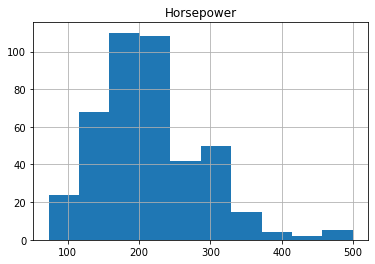

In [31]:
df2.hist('Horsepower')

<AxesSubplot:xlabel='Horsepower', ylabel='MPG_Highway'>

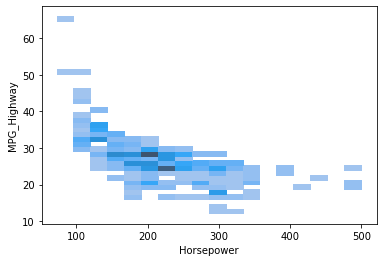

In [32]:
import pandas as pd
import seaborn as sns
#import matplotlib.pyplot as plt

sns.histplot(df2, x="Horsepower", y="MPG_Highway")


<AxesSubplot:xlabel='Horsepower', ylabel='MPG_Highway'>

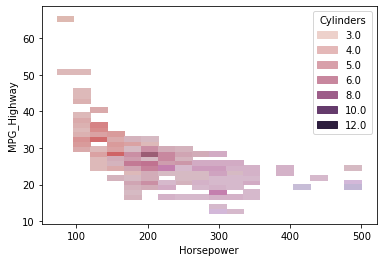

In [33]:
sns.histplot(df2, x="Horsepower", y="MPG_Highway", hue="Cylinders")

<AxesSubplot:>

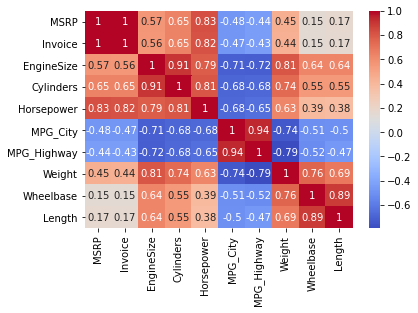

In [34]:
sns.heatmap(df2.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [35]:
# From Pandas Dataframe to a SAS dataset
import pandas as pd
cal_hse_df = pd.read_csv('https://dl.google.com/mlcc/mledu-datasets/california_housing_train.csv')
sasdf = sas.df2sd(df=cal_hse_df, table= 'sas_cal_hse', libref='work')

In [36]:
# Check if 'sas_cal_hse' is correctly created
print(sas.lastlog())


83                                                         The SAS System                       Wednesday, June  8, 2022 04:35:00 PM

517        ;*';*";*/;
518        
519                data _null_; retain libref; retain cobs 1;
520                   set sashelp.vlibnam end=last;
521                   if cobs EQ 1 then
522                      put "LIBREFSSTART=";
523                   cobs = 2;
524                   if libref NE libname then
525                      put  %upcase("lib=") libname  %upcase('libEND=');
526                   libref = libname;
527                   if last then
528                      put "LIBREFSEND=";
529                run;
LIBREFSSTART=
LIB=WORK LIBEND=
LIB=MAPS LIBEND=
LIB=SASDATA LIBEND=
LIB=STPSAMP LIBEND=
LIB=SASHELP LIBEND=
LIB=MAPSSAS LIBEND=
LIB=MAPSGFK LIBEND=
LIB=SASUSER LIBEND=
LIBREFSEND=
530        
531        
532        ;*';*";*/;
533        

84                                                         The SAS System                     

In [37]:
# Submit and show OUTPUT
sas_code = ''' proc print data=work.sas_cal_hse (obs=5);run; quit; '''
sas.submitLST(sas_code, method='listorlog')

In [38]:
type(sasdf)

saspy.sasdata.SASdata

In [39]:
sasdf.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0

## SASstat object

In [40]:
stat = sas.sasstat()
# run a regression
stat_results = stat.reg(model='horsepower = Cylinders EngineSize',data=cars)

In [41]:
# check all SASresults object
dir(stat_results)

['ANOVA',
 'COOKSDPLOT',
 'DFBETASPANEL',
 'DFFITSPLOT',
 'DIAGNOSTICSPANEL',
 'FITSTATISTICS',
 'LOG',
 'NOBS',
 'OBSERVEDBYPREDICTED',
 'PARAMETERESTIMATES',
 'QQPLOT',
 'RESIDUALBOXPLOT',
 'RESIDUALBYPREDICTED',
 'RESIDUALHISTOGRAM',
 'RESIDUALPLOT',
 'RFPLOT',
 'RSTUDENTBYLEVERAGE',
 'RSTUDENTBYPREDICTED']

In [42]:
stat_results.ANOVA

Source     DF            SS             MS      FValue  \
0            Model    2.0  1.487804e+06  743901.866012  440.192215   
1            Error  423.0  7.148479e+05    1689.947803         NaN   
2  Corrected Total  425.0  2.202652e+06            NaN         NaN   

           ProbF  
0  4.296828e-104  
1            NaN  
2            NaN

Source     DF            SS             MS      FValue  \
0            Model    2.0  1.487804e+06  743901.866012  440.192215   
1            Error  423.0  7.148479e+05    1689.947803         NaN   
2  Corrected Total  425.0  2.202652e+06            NaN         NaN   

           ProbF  
0  4.296828e-104  
1            NaN  
2            NaN


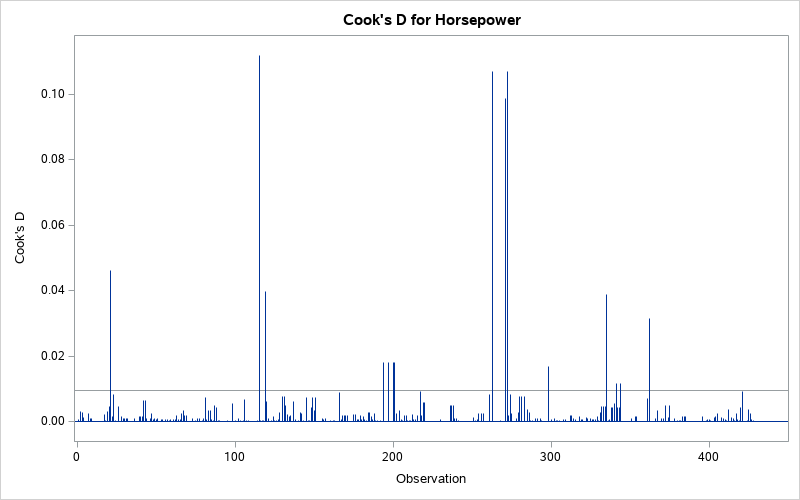


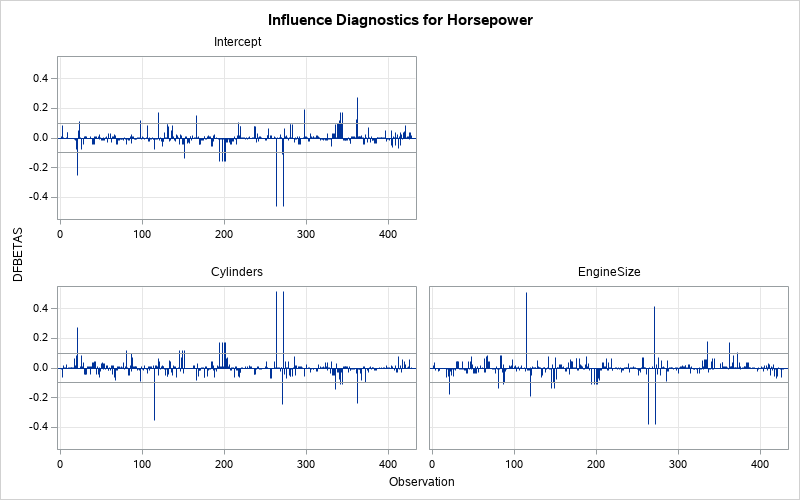


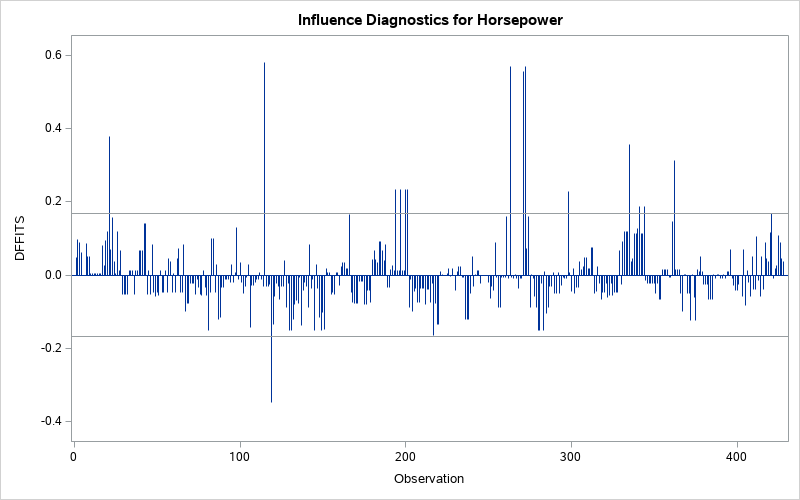


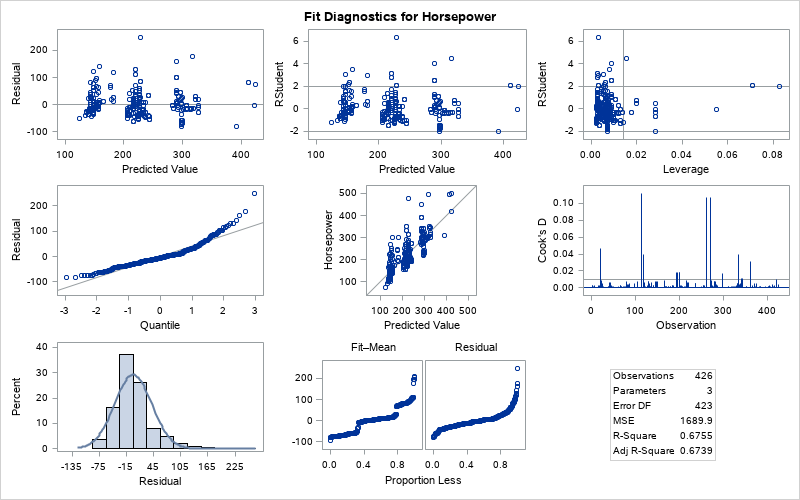

Label1    cValue1     nValue1    Label2 cValue2   nValue2
0        Root MSE   41.10897   41.108975  R-Square  0.6755  0.675460
1  Dependent Mean  215.87793  215.877934  Adj R-Sq  0.6739  0.673926
2       Coeff Var   19.04269   19.042694       NaN     NaN  0.000000

N  NObsRead  NObsUsed  SumFreqsRead  SumFreqsUsed  NObsMiss
0  428.0     428.0     426.0         428.0         426.0       2.0
1  426.0     428.0     426.0         428.0         426.0       2.0
2    2.0     428.0     426.0         428.0         426.0       2.0


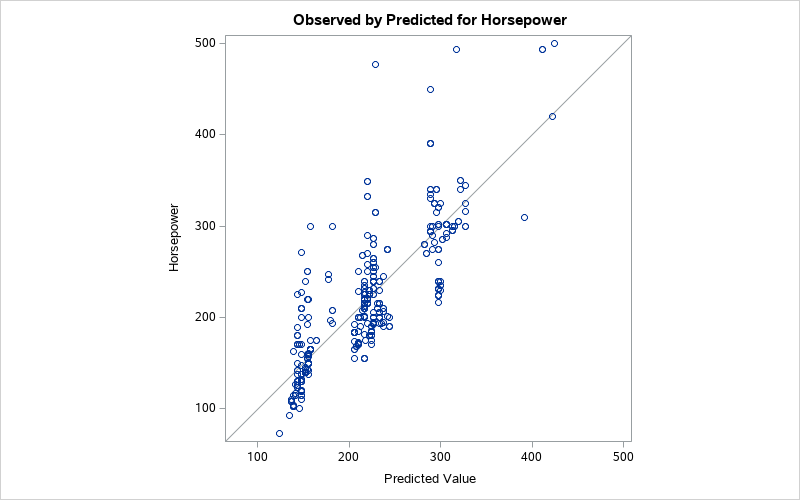

Variable   DF   Estimate    StdErr    tValue         Probt  \
0   Intercept  1.0   9.766817  8.023541  1.217270  2.241801e-01   
1   Cylinders  1.0  23.702956  3.054032  7.761202  6.382821e-14   
2  EngineSize  1.0  21.354879  4.313046  4.951229  1.067389e-06   

             Label  
0        Intercept  
1              NaN  
2  Engine Size (L)


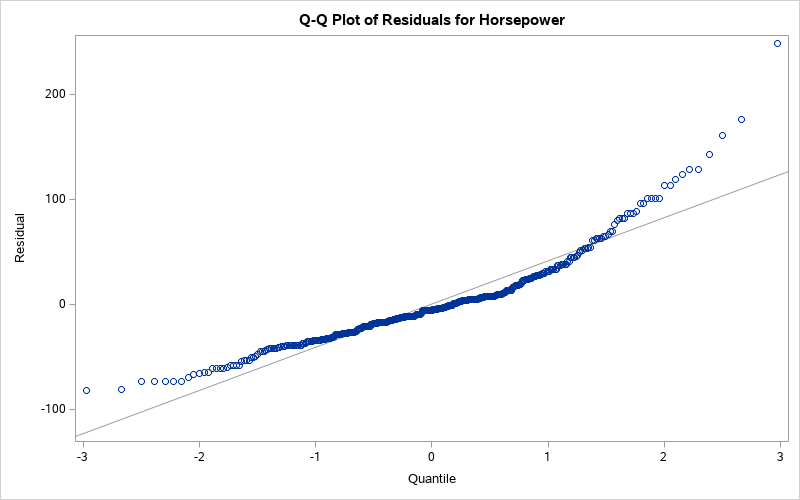


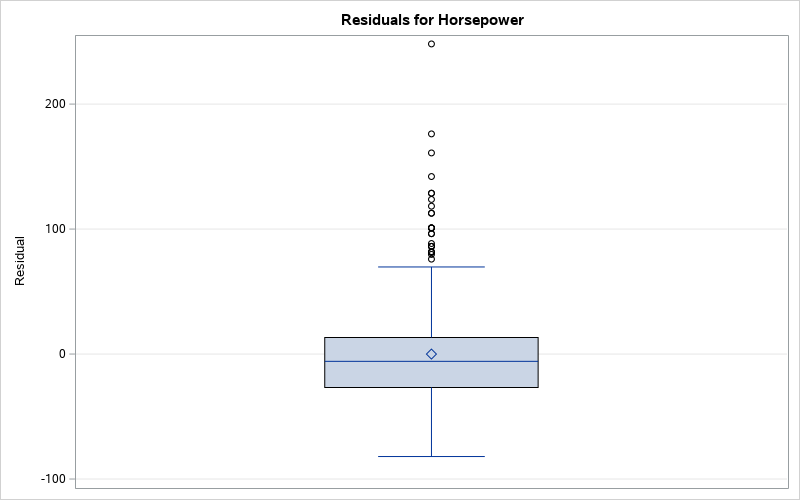


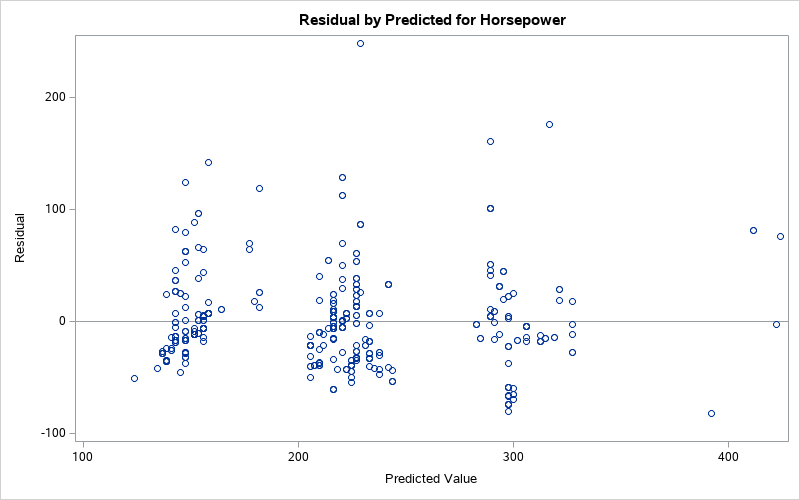


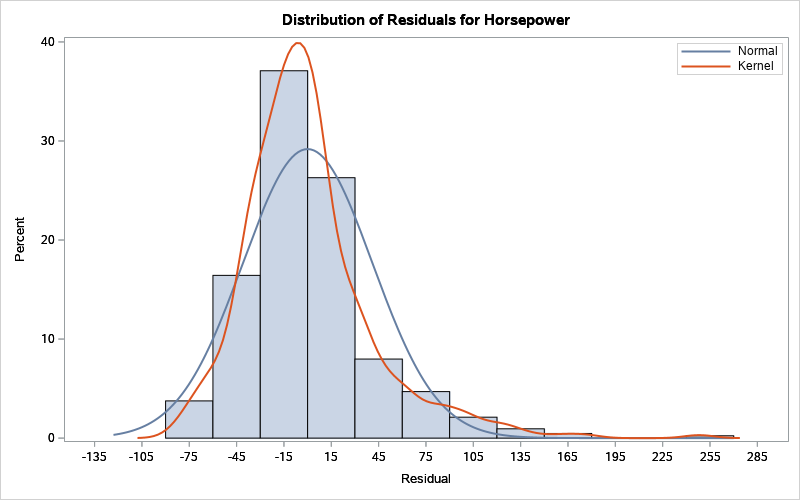


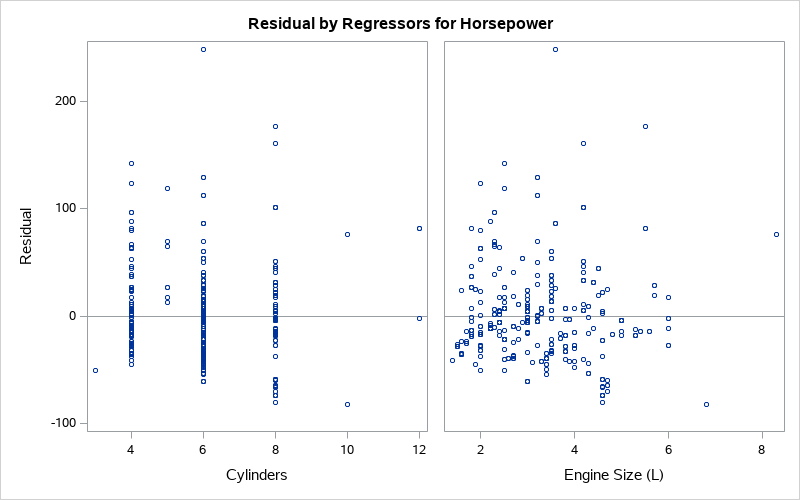


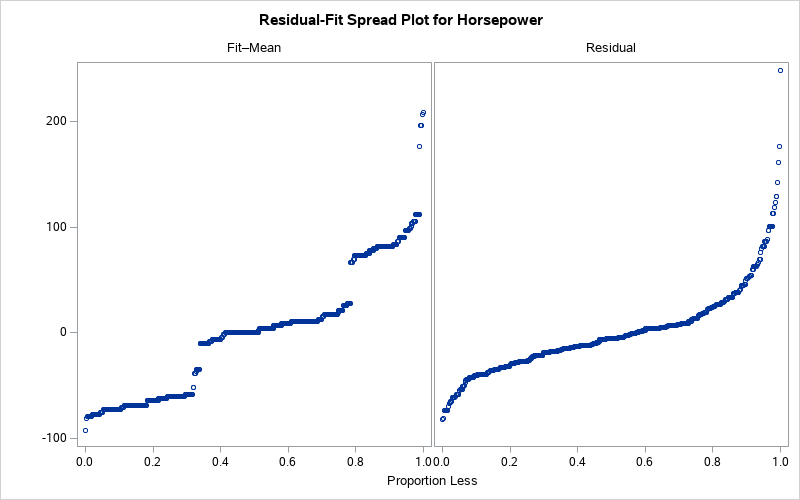


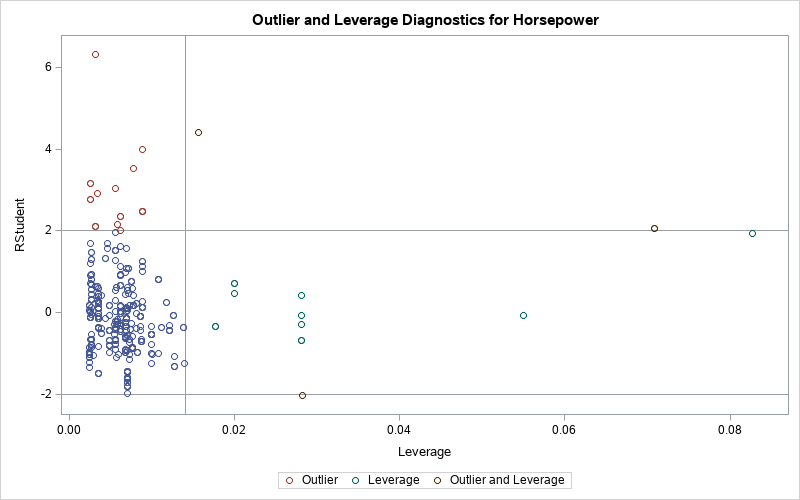


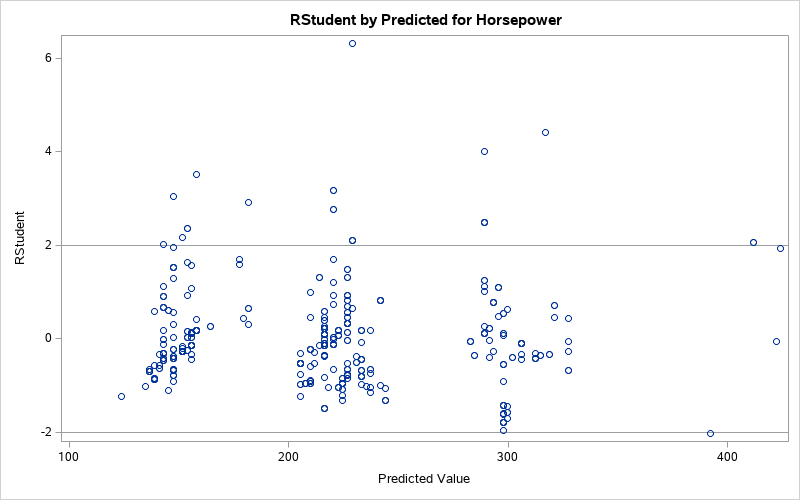

In [43]:
# display All models
stat_results.ALL()

## Econometrics and Time Series Analysis (ETS object)

In [44]:
ets = sas.sasets()
ets_results = ets.timeid(id='horsepower', data=cars)
dir(ets_results)

['DECOMPOSITIONPLOT',
 'INTERVALCOUNTSCOMPONENTPLOT',
 'LOG',
 'OFFSETCOMPONENTPLOT',
 'SPANCOMPONENTPLOT',
 'VALUESPLOT']


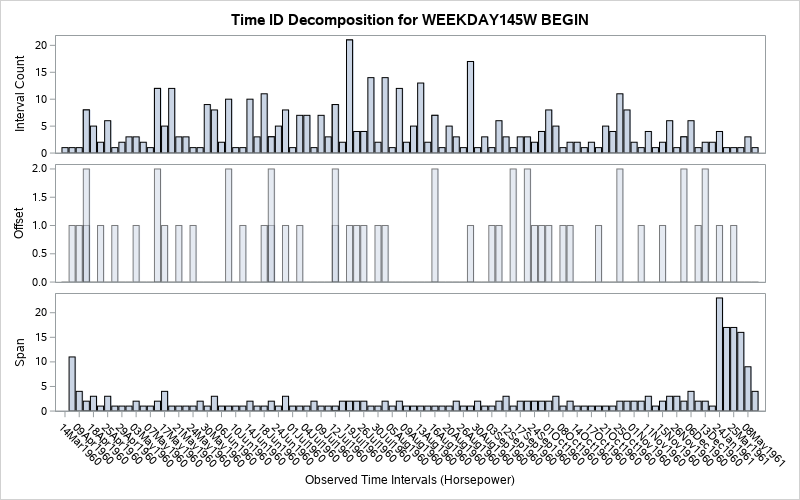


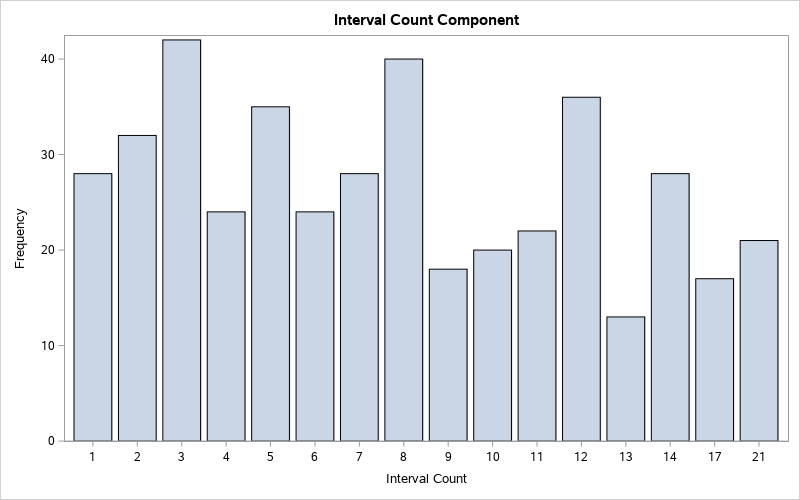


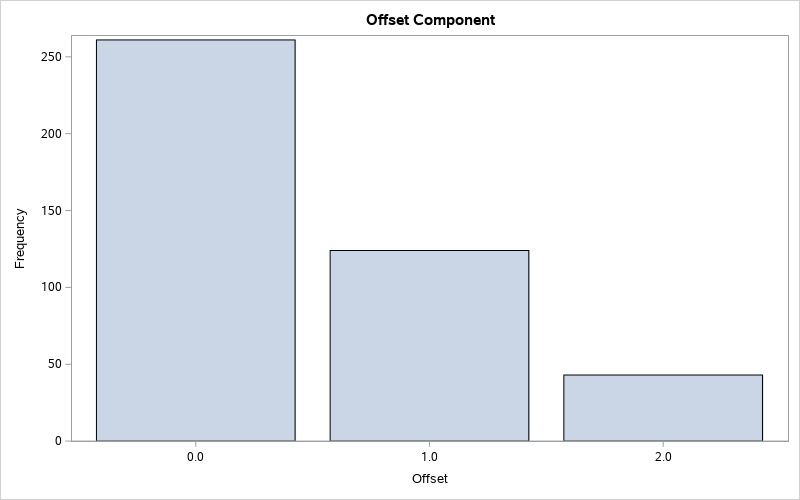


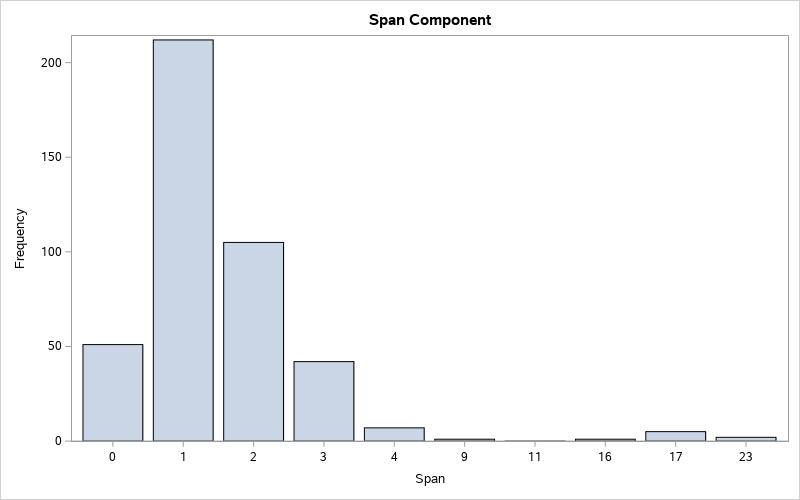


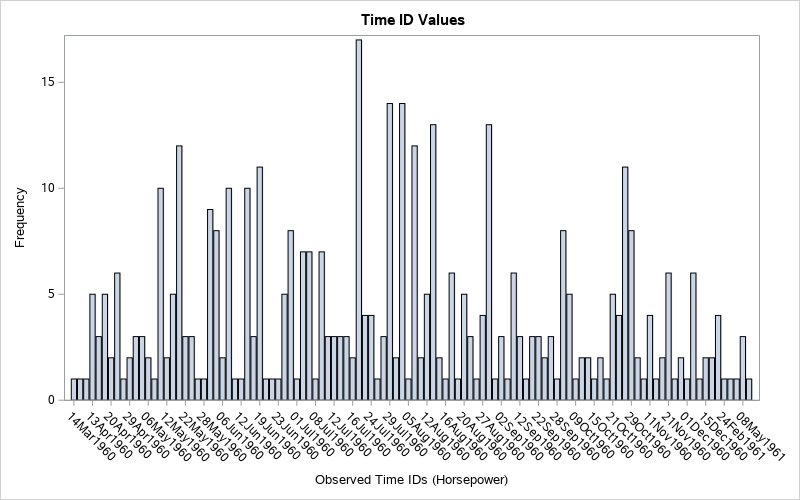

In [45]:
ets_results.ALL()

### Machine Learning with SASPy

import saspy
sas = saspy.SASsession()
sas

In [46]:
#sas.saslib('mylib', "'c:\\Users\\Public\\SASPy Works In Progress'")
#print(sas.saslog())

In [47]:
# From Pandas Dataframe to a SAS dataset
import pandas as pd
census_df = pd.read_csv('http://www.creditriskanalytics.net/uploads/1/9/5/1/19511601/hmeq.csv')

census_df.head(10)


BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   
5    1  1700  30548.0   40320.0  HomeImp   Other   9.0    0.0     0.0   
6    1  1800  48649.0   57037.0  HomeImp   Other   5.0    3.0     2.0   
7    1  1800  28502.0   43034.0  HomeImp   Other  11.0    0.0     0.0   
8    1  2000  32700.0   46740.0  HomeImp   Other   3.0    0.0     2.0   
9    1  2000      NaN   62250.0  HomeImp   Sales  16.0    0.0     0.0   

        CLAGE  NINQ  CLNO    DEBTINC  
0   94.366667   1.0   9.0        NaN  
1  121.833333   0.0  14.0        NaN  
2  149.466667   1.0  10.0        NaN  
3         NaN   NaN   NaN        NaN  
4   93.333333   0.0  14.0        NaN  
5  101.466002   1.0   8.0  37.113614  
6   77.100000   1.0  17.0        NaN  
7   88.766030   0.0   8.0  36.884894  
8  216.933333   1.0  12.0        NaN  
9  115.800000   0.0  13.0        NaN

A data dictionary is provided below:

    Column	Description
    BAD     1 = client defaulted, 0 = loan repaid
    LOAN	Amount of the loan request
    MORTDUE	Amount due on existing mortgage
    VALUE	Value of current property
    REASON	DebtCon = Debt Consolidation, HomeImp = Home Improvement
    JOB	    Client's occupational category
    YOJ	    Years at present job
    DEROG	Number of derogatory reports
    DELINQ	Number of delinquent credit lines
    CLAGE	Age of oldest trade line in months
    NINQ	Number of recent credit lines
    CLNO	Number of credit lines
    DEBTINC	Debt-to-income ratio

In [48]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [49]:
# how many missing values are in each column
census_df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [50]:
# send back to SAS
sasdf = sas.df2sd(df=census_df, table= 'sas_census', libref='work')

In [51]:
%%SAS sas
ods output Members=Members;
proc datasets library=work memtype=data;
run;
quit;

In [52]:
sasdf.columnInfo()

Member   Num Variable  Type  Len   Pos
0   WORK.SAS_CENSUS   1.0      BAD   Num  8.0   0.0
1   WORK.SAS_CENSUS  10.0    CLAGE   Num  8.0  56.0
2   WORK.SAS_CENSUS  12.0     CLNO   Num  8.0  72.0
3   WORK.SAS_CENSUS  13.0  DEBTINC   Num  8.0  80.0
4   WORK.SAS_CENSUS   9.0   DELINQ   Num  8.0  48.0
5   WORK.SAS_CENSUS   8.0    DEROG   Num  8.0  40.0
6   WORK.SAS_CENSUS   6.0      JOB  Char  7.0  95.0
7   WORK.SAS_CENSUS   2.0     LOAN   Num  8.0   8.0
8   WORK.SAS_CENSUS   3.0  MORTDUE   Num  8.0  16.0
9   WORK.SAS_CENSUS  11.0     NINQ   Num  8.0  64.0
10  WORK.SAS_CENSUS   5.0   REASON  Char  7.0  88.0
11  WORK.SAS_CENSUS   4.0    VALUE   Num  8.0  24.0
12  WORK.SAS_CENSUS   7.0      YOJ   Num  8.0  32.0

In [53]:
sasdf.head()

BAD    LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0  1.0  1100.0  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1  1.0  1300.0  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2  1.0  1500.0  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3  1.0  1500.0      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4  0.0  1700.0  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN

### Exploring and Visualizing Data

In [54]:
sasdf.describe()

Variable       N   NMiss        Median           Mean        StdDev  \
0       BAD  5960.0     0.0      0.000000       0.199497      0.399656   
1      LOAN  5960.0     0.0  16300.000000   18607.969799  11207.480417   
2   MORTDUE  5442.0   518.0  65019.000000   73760.817200  44457.609458   
3     VALUE  5848.0   112.0  89235.500000  101776.048741  57385.775334   
4       YOJ  5445.0   515.0      7.000000       8.922268      7.573982   
5     DEROG  5252.0   708.0      0.000000       0.254570      0.846047   
6    DELINQ  5380.0   580.0      0.000000       0.449442      1.127266   
7     CLAGE  5652.0   308.0    173.466667     179.766275     85.810092   
8      NINQ  5450.0   510.0      1.000000       1.186055      1.728675   
9      CLNO  5738.0   222.0     20.000000      21.296096     10.138933   
10  DEBTINC  4693.0  1267.0     34.818262      33.779915      8.601746   

            Min           P25           P50            P75            Max  
0      0.000000      0.000000      0.000000       0.000000       1.000000  
1   1100.000000  11100.000000  16300.000000   23300.000000   89900.000000  
2   2063.000000  46268.000000  65019.000000   91491.000000  399550.000000  
3   8000.000000  66069.000000  89235.500000  119831.500000  855909.000000  
4      0.000000      3.000000      7.000000      13.000000      41.000000  
5      0.000000      0.000000      0.000000       0.000000      10.000000  
6      0.000000      0.000000      0.000000       0.000000      15.000000  
7      0.000000    115.103197    173.466667     231.574834    1168.233561  
8      0.000000      0.000000      1.000000       2.000000      17.000000  
9      0.000000     15.000000     20.000000      26.000000      71.000000  
10     0.524499     29.140031     34.818262      39.003141     203.312149


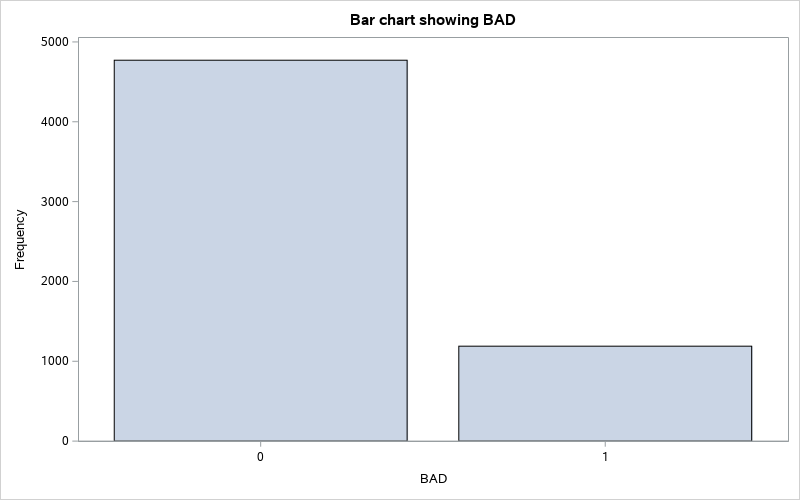


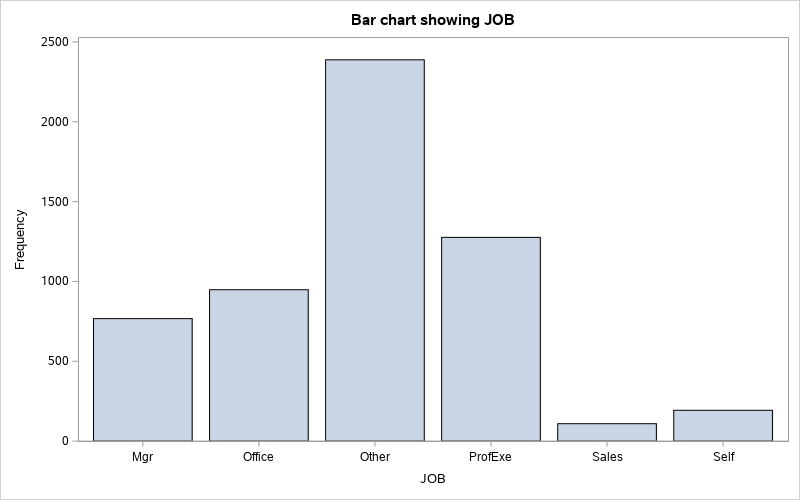


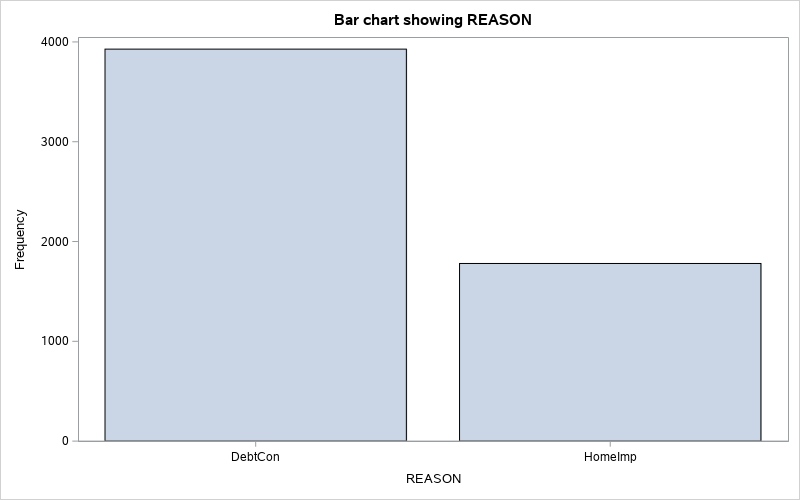

In [55]:
for col in ['bad','job', 'reason']:
    sasdf.bar(col, title='Bar chart showing '+ col.upper())


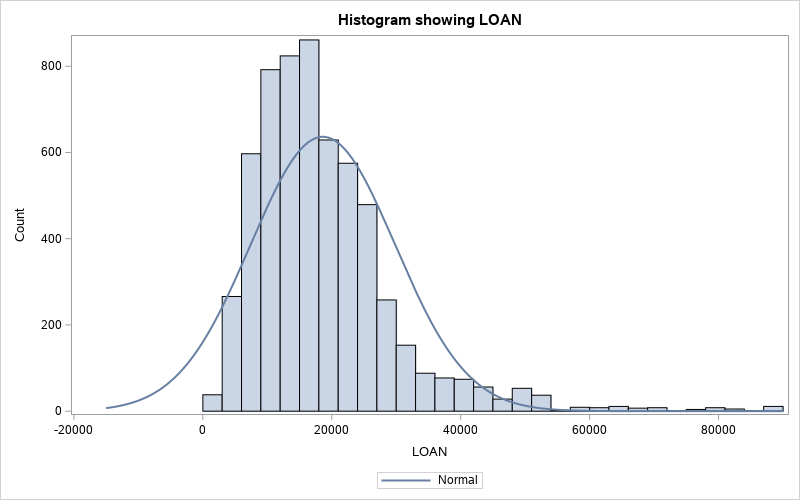


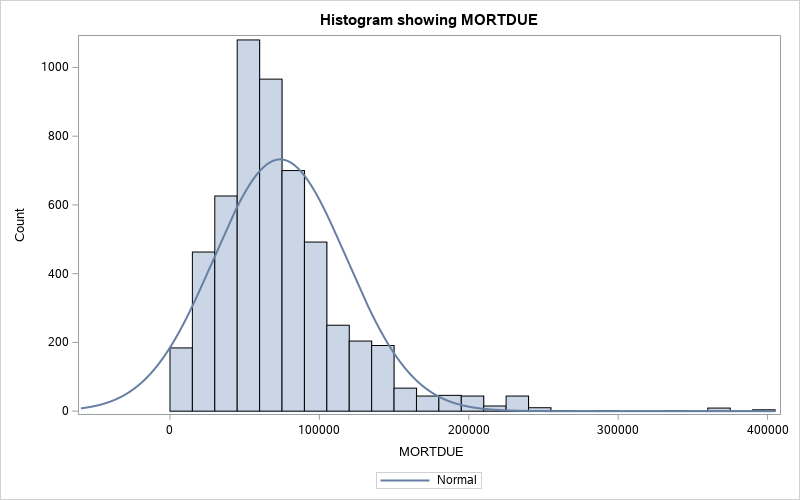


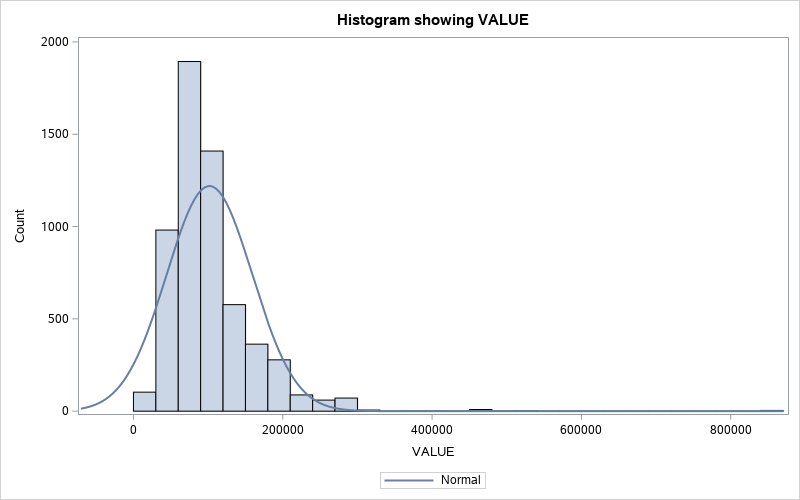


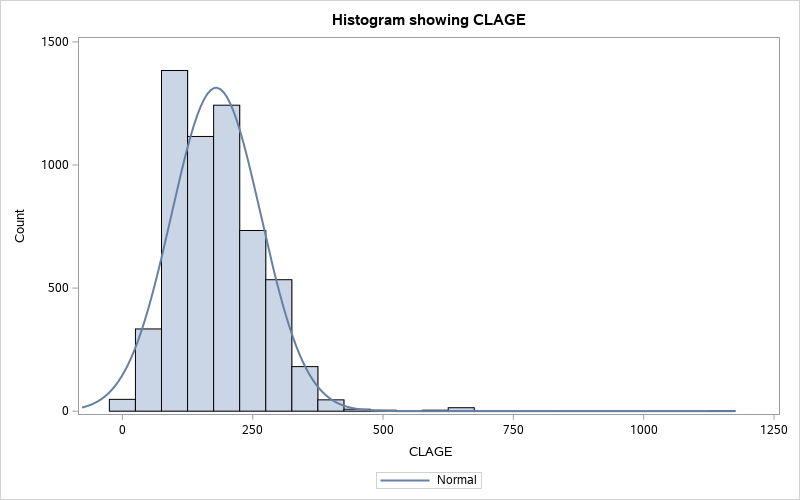

In [56]:
for col in ['loan','mortdue', 'value','clage']:
    sasdf.hist(col, title='Histogram showing '+col.upper())


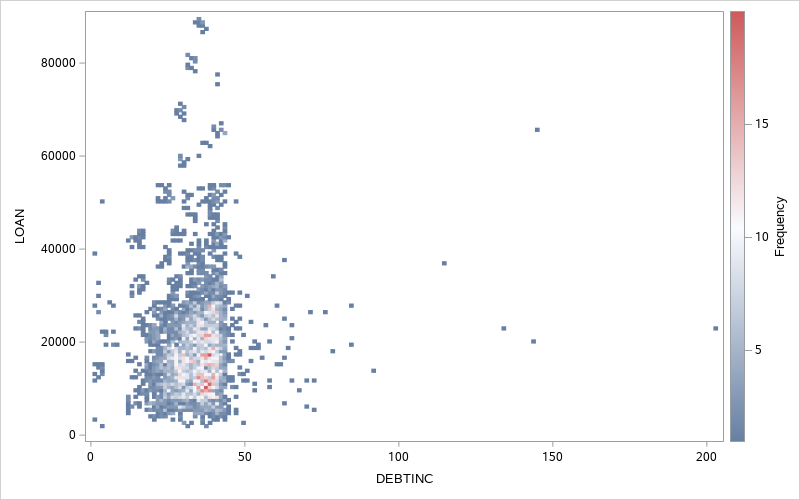

In [57]:
# Is there a relationship between Debt-to-Income Ratio and the amount of the requested loan?
sasdf.heatmap('DEBTINC', 'LOAN')

### Running SAS Code

In [58]:
sas.teach_me_SAS(True)
sasdf.heatmap('DEBTINC', 'LOAN')
sas.teach_me_SAS(False)

proc sgplot data=work.'sas_census'n ;
	heatmap x='DEBTINC'n y='LOAN'n;;
run;
title;



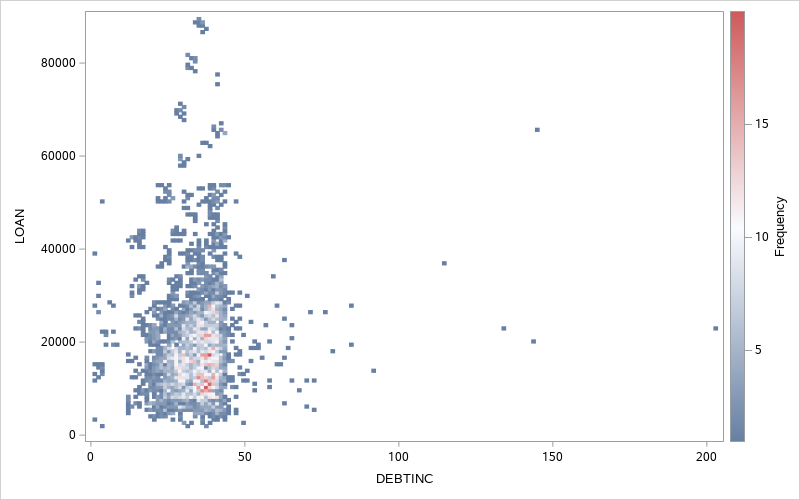

In [59]:
%%SAS sas
proc sgplot data=work.'sas_census'n ;
heatmap x='DEBTINC'n y='LOAN'n;;
run;
title;

### Cleanig missing data

In [60]:
sasdf.impute({'MEDIAN':[ 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC','DELINQ']})
sasdf.add_vars({'JOB':'COALESCEC(JOB, "Other")'})
sasdf.add_vars({'REASON': 'COALESCEC(REASON, "DebtCon")'})


313                                                        The SAS System                       Wednesday, June  8, 2022 04:35:00 PM

25181      
25182      data work.'sas_census'n ; set work.'sas_census'n ;
25183      JOB = COALESCEC(JOB, "Other");
25184      ; run;
25185      
25186      
25187      

314                                                        The SAS System                       Wednesday, June  8, 2022 04:35:00 PM

25188      

317                                                        The SAS System                       Wednesday, June  8, 2022 04:35:00 PM

25203      
25204      data work.'sas_census'n ; set work.'sas_census'n ;
25205      REASON = COALESCEC(REASON, "DebtCon");
25206      ; run;
25207      
25208      
25209      

318                                                        The SAS System                       Wednesday, June  8, 2022 04:35:00 PM

25210      


### Split data into training and testing

In [61]:
sasdf.partition(fraction=.7)
sasdf.head()

REASON     JOB  BAD    LOAN  MORTDUE     VALUE   YOJ  DEROG  DELINQ  \
0  HomeImp   Other  1.0  1100.0  25860.0   39025.0  10.5    0.0     0.0   
1  HomeImp   Other  1.0  1300.0  70053.0   68400.0   7.0    0.0     2.0   
2  HomeImp   Other  1.0  1500.0  13500.0   16700.0   4.0    0.0     0.0   
3  DebtCon   Other  1.0  1500.0  65019.0   89235.5   7.0    0.0     0.0   
4  HomeImp  Office  0.0  1700.0  97800.0  112000.0   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO   DEBTINC  _PartInd_  
0   94.366667   1.0   9.0  34.81826        1.0  
1  121.833333   0.0  14.0  34.81826        1.0  
2  149.466667   1.0  10.0  34.81826        1.0  
3  173.466700   1.0  20.0  34.81826        1.0  
4   93.333333   0.0  14.0  34.81826        1.0

In [62]:
# create some variable names to represent our various inputs
# Target
t = 'BAD'
# Class Variables 
var_class = ['REASON','JOB', 'BAD']
# Interval Variables 
var_interval = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
# Input Variables 
var_inputs = ['REASON','JOB', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

### Getting Started Building SAS Models

In [63]:
stat=sas.sasstat() # create a logistic regression and a decision tree 
ml=sas.sasml()   # create a random forest.


### SAS Logistic Regression - use PROC HPLOGISTIC to create a logistic regression

In [64]:
hplogistic_model = stat.hplogistic(data=sasdf, 
                                   cls=var_class, 
                                   model="bad(event='1')= reason job YOJ loan mortdue value debtinc clage",  
                                   out = 'work.log_score predicted=Pred',
                                   id = ["_PartInd_", "BAD"], 
                                   partition="rolevar=_partind_(TRAIN='1' VALIDATE='0');")
print(sas.lastlog())


336                                                        The SAS System                       Wednesday, June  8, 2022 04:35:00 PM

25328      ;*';*";*/;
25329      %macro proccall(d);
25330      proc hplogistic data=work.'sas_census'n    ;
25331      class REASON JOB BAD;
25332      model bad(event='1')= reason job YOJ loan mortdue value debtinc clage;
25333      output out= work.log_score predicted=Pred;
25334      id _PartInd_ BAD;
25335      partition rolevar=_partind_(TRAIN='1' VALIDATE='0');;
25336      run; quit; %mend;
25337      %mangobj(hpl0003,hplogistic,'sas_census'n);
25341      
25342      ;*';*";*/;
25343      

337                                                        The SAS System                       Wednesday, June  8, 2022 04:35:00 PM

25344      
25345      %put E3969440A681A2408885998500000160;
E3969440A681A2408885998500000160
25346      

338                                                        The SAS System                       Wednesday, June  8, 2022

In [65]:
dir(hplogistic_model)

['CLASSLEVELS',
 'CONVERGENCESTATUS',
 'DATAACCESSINFO',
 'DIMENSIONS',
 'FITSTATISTICS',
 'GLOBALTESTS',
 'ITERHISTORY',
 'LOG',
 'MODELINFO',
 'NOBS',
 'PARAMETERESTIMATES',
 'PARTFITSTATS',
 'PERFORMANCEINFO',
 'RESPONSEPROFILE']

In [66]:
hplogistic_model.ALL()

Class  Levels                               Values
0  REASON     2.0                      DebtCon HomeImp
1     JOB     6.0  Mgr Office Other ProfExe Sales Self

Reason  Status  Separation
0  Convergence criterion (GCONV=1E-8) satisfied.     0.0         0.0

Engine             Data       Path    Role
0     V9  WORK.SAS_CENSUS  On Client   Input
1     V9   WORK.LOG_SCORE  On Client  Output

Descr  Value
0                  Columns in X   15.0
1             Number of Effects    9.0
2            Max Effect Columns    6.0
3  Rank of Cross-product Matrix   13.0
4    Parameters in Optimization   13.0

Descr     Training   Validation
0         -2 Log Likelihood  3812.905205  1699.360137
1   AIC (smaller is better)  3838.905205  1725.360137
2  AICC (smaller is better)  3838.992747  1725.565323
3   BIC (smaller is better)  3921.275165  1796.715225

Test      ChiSq    DF     ProbChiSq
0  Likelihood Ratio  319.39781  12.0  3.932787e-61

Iteration  Evaluations  Objective        Change  MaxGradient
0        0.0          4.0   0.462264           NaN  2629.137625
1        1.0          2.0   0.456987  5.276824e-03   210.022255
2        2.0          2.0   0.456964  2.298002e-05     0.979229
3        3.0          2.0   0.456964  7.087499e-10     0.000035

Descr                        Value
0             Data Source              WORK.SAS_CENSUS
1       Response Variable                          BAD
2  Class Parameterization                          GLM
3            Distribution                       Binary
4           Link Function                        Logit
5  Optimization Technique  Newton-Raphson with Ridging

Label       N  Training  Validation  NobsRead  \
0  Number of Observations Read  5960.0    4172.0      1788.0    5960.0   
1  Number of Observations Used  5960.0    4172.0      1788.0    5960.0   

   NobsUsed  SumFreqsRead  SumFreqsUsed  
0    5960.0        5960.0        5960.0  
1    5960.0        5960.0        5960.0

Effect       Parameter   REASON      JOB  Estimate    StdErr  DF  \
0   Intercept       Intercept      NaN      NaN -1.509586  0.333502 NaN   
1      REASON  REASON DebtCon  DebtCon      NaN -0.128853  0.091647 NaN   
2      REASON  REASON HomeImp  HomeImp      NaN  0.000000       NaN NaN   
3         JOB         JOB Mgr      NaN      Mgr -0.315160  0.233205 NaN   
4         JOB      JOB Office      NaN   Office -1.228535  0.242232 NaN   
5         JOB       JOB Other      NaN    Other -0.517786  0.218512 NaN   
6         JOB     JOB ProfExe      NaN  ProfExe -0.657795  0.226923 NaN   
7         JOB       JOB Sales      NaN    Sales  0.034034  0.339042 NaN   
8         JOB        JOB Self      NaN     Self  0.000000       NaN NaN   
9         YOJ             YOJ      NaN      NaN -0.007107  0.006227 NaN   
10       LOAN            LOAN      NaN      NaN -0.000018  0.000004 NaN   
11    MORTDUE         MORTDUE      NaN      NaN -0.000005  0.000002 NaN   
12      VALUE           VALUE      NaN      NaN  0.000002  0.000001 NaN   
13    DEBTINC         DEBTINC      NaN      NaN  0.064387  0.006837 NaN   
14      CLAGE           CLAGE      NaN      NaN -0.005666  0.000582 NaN   

      tValue         Probt  
0  -4.526465  5.997863e-06  
1  -1.405977  1.597310e-01  
2        NaN           NaN  
3  -1.351430  1.765576e-01  
4  -5.071726  3.942246e-07  
5  -2.369598  1.780745e-02  
6  -2.898763  3.746382e-03  
7   0.100382  9.200412e-01  
8        NaN           NaN  
9  -1.141303  2.537438e-01  
10 -3.939326  8.171100e-05  
11 -2.939941  3.282745e-03  
12  1.765930  7.740759e-02  
13  9.417801  4.606354e-21  
14 -9.738463  2.066553e-22

Statistic  Training  Validation
0       Area under the ROCC  0.698625    0.682927
1      Average Square Error  0.143628    0.149819
2      Hosmer-Lemeshow Test  0.000044    0.000364
3   Misclassification Error  0.188399    0.199664
4                  R-Square  0.073700    0.066963
5     Max-rescaled R-Square  0.117245    0.104742
6       McFadden's R-Square  0.077293    0.067969
7           Mean Difference  0.083867    0.083973
8                 Somers' D  0.397250    0.365854
9    True Negative Fraction  0.998509    0.997179
10   True Positive Fraction  0.046398    0.045946

Descr           Value  nValue
0     Execution Mode  Single-Machine     NaN
1  Number of Threads               2     2.0

OrderedValue  BAD Outcome   Count  Training  Validation
0           1.0  0.0       0  4771.0    3353.0      1418.0
1           2.0  1.0       1  1189.0     819.0       370.0

### SAS Decision Tree

In [67]:
# code= 'trescore.sas',
hpsplit_model = stat.hpsplit(data=sasdf, 
                             cls=var_class, 
                             model="bad(event='1')= reason job YOJ loan mortdue value debtinc clage", 
                              
                             procopts='assignmissing=similar', 
                             out = 'work.dt_score',
                             id = "_PartInd_",
                             partition="rolevar=_partind_(TRAIN='1' VALIDATE='0');")
print(sas.lastlog())
#dir(hpsplit_model)


483                                                        The SAS System                       Wednesday, June  8, 2022 04:35:00 PM

26275      ;*';*";*/;
26276      %macro proccall(d);
26277      proc hpsplit data=work.'sas_census'n  plot=all assignmissing=similar ;
26278      class REASON JOB BAD;
26279      model bad(event='1')= reason job YOJ loan mortdue value debtinc clage;
26280      output out= work.dt_score;
26281      id _PartInd_;
26282      partition rolevar=_partind_(TRAIN='1' VALIDATE='0');;
26283      run; quit; %mend;
26284      %mangobj(hps0004,hpsplit,'sas_census'n);
26290      
26291      ;*';*";*/;
26292      

484                                                        The SAS System                       Wednesday, June  8, 2022 04:35:00 PM

26293      
26294      %put E3969440A681A2408885998500000227;
E3969440A681A2408885998500000227
26295      

485                                                        The SAS System                       Wednesday, June  8, 2

Partition ActualValue  Predicted1  Predicted2  LevelMisclassRate
0    Training           0      3280.0        73.0           0.021772
1    Training           1       310.0       509.0           0.378510
2  Validation           0      1346.0        72.0           0.050776
3  Validation           1       190.0       180.0           0.513514

Engine             Data       Path    Role
0     V9  WORK.SAS_CENSUS  On Client   Input
1     V9    WORK.DT_SCORE  On Client  Output

Description        TextValue
0             Split Criterion Used          Entropy
1                   Pruning Method  Cost-Complexity
2     Subtree Evaluation Criterion  Cost-Complexity
3               Number of Branches                2
4     Maximum Tree Depth Requested               10
5      Maximum Tree Depth Achieved               10
6                       Tree Depth               10
7  Number of Leaves Before Pruning              195
8   Number of Leaves After Pruning              125
9                Model Event Level                1

Label       N  NObsRead  NObsUsed  \
0             Number of Observations Read  5960.0    5960.0    5960.0   
1             Number of Observations Used  5960.0    5960.0    5960.0   
2    Number of Training Observations Used  4172.0    5960.0    5960.0   
3  Number of Validation Observations Used  1788.0    5960.0    5960.0   

   SumFreqsUsed  TrainingNObsUsed  TrainingSumFreqsUsed  ValidationNObsUsed  \
0        5960.0            4172.0                4172.0              1788.0   
1        5960.0            4172.0                4172.0              1788.0   
2        5960.0            4172.0                4172.0              1788.0   
3        5960.0            4172.0                4172.0              1788.0   

   ValidationSumFreqsUsed  
0                  1788.0  
1                  1788.0  
2                  1788.0  
3                  1788.0

Descr           Value  nValue
0     Execution Mode  Single-Machine     NaN
1  Number of Threads               2     2.0


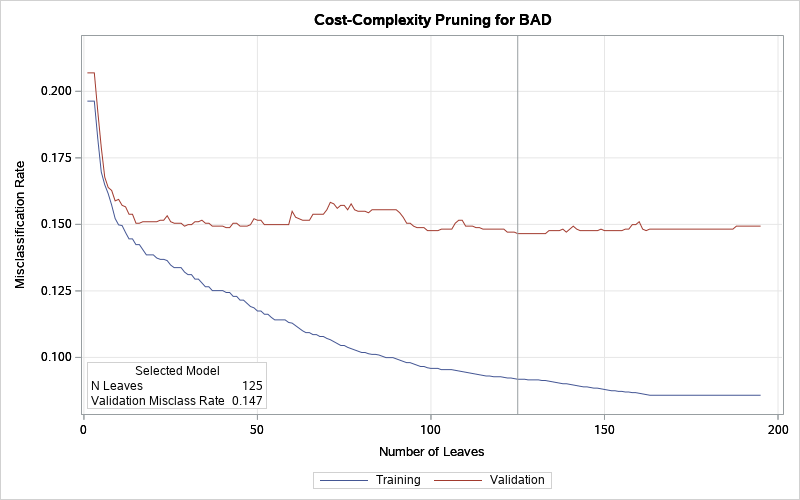


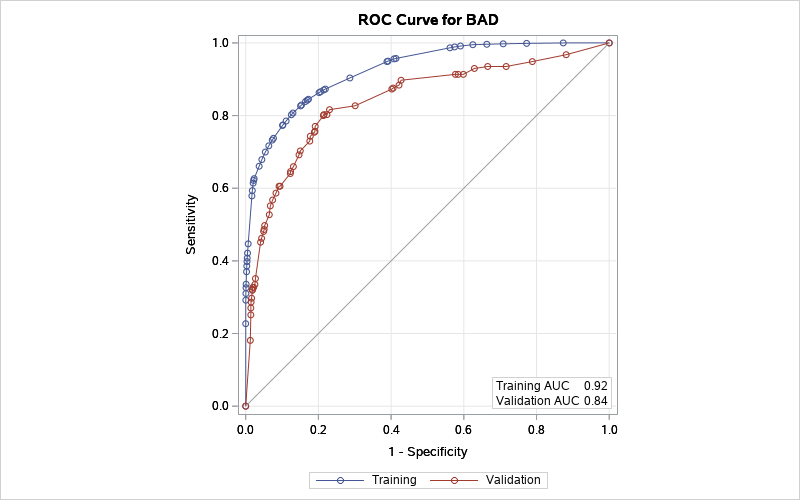

DataSet  NumLeaves       ASE  MiscRate  Sensitivity  Specificity  \
0    Training      125.0  0.072550  0.091802     0.621490     0.978228   
1  Validation      125.0  0.113895  0.146532     0.486486     0.949224   

    Entropy      Gini         RSS       AUC  
0  0.350387  0.145100  605.356023  0.924286  
1  0.437062  0.186698  407.289394  0.841769

Variable  RelativeImportance  SSEImportance  ValidRelImport  ValidSSEImport  \
0  DEBTINC            1.000000      18.162096        1.000000       12.466592   
1     LOAN            0.444212       8.067814        0.368181        4.589966   
2  MORTDUE            0.416584       7.566034        0.361124        4.501989   
3    CLAGE            0.526280       9.558347        0.360169        4.490080   
4    VALUE            0.420415       7.635625        0.281751        3.512472   
5      YOJ            0.336294       6.107799        0.220699        2.751369   
6      JOB            0.427279       7.760274        0.218264        2.721008   
7   REASON            0.188351       3.420855        0.165806        2.067040   

   ImportanceRatio  Count  
0         1.000000    7.0  
1         0.828842   19.0  
2         0.866871   21.0  
3         0.684368   23.0  
4         0.670172   18.0  
5         0.656270   13.0  
6         0.510824   19.0  
7         0.880303    4.0


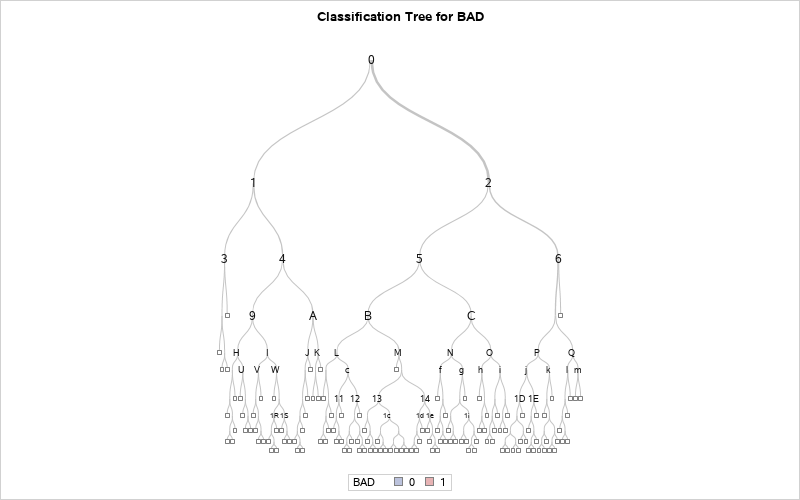


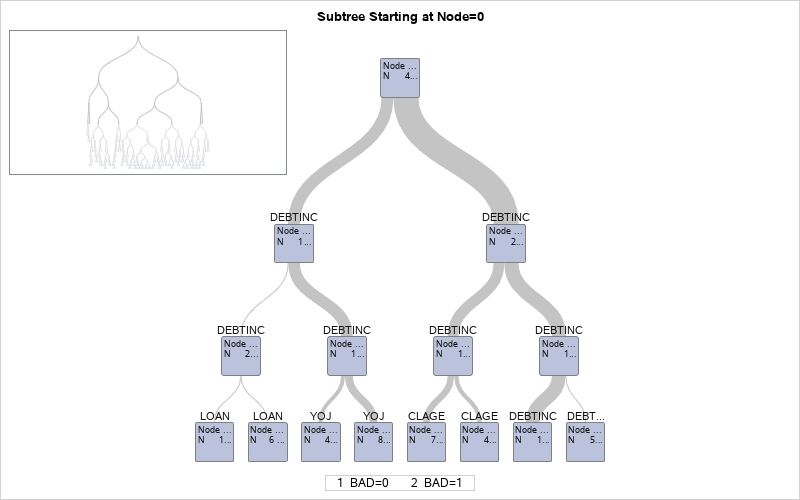

In [68]:
hpsplit_model.ALL()

### SAS Random Forest Model - use PROC HPFOREST to create a random forest model

In [69]:
hpforest_model = ml.hpforest(data=sasdf,
                             input=var_inputs
                             ,target="BAD /level = binary",
                             score = "out = work.forest_score",
                             id = "_PartInd_",
                             partition="rolevar=_partind_(TRAIN='1' VALIDATE='0');")
print(sas.lastlog())

C:\Users\avitr\anaconda3\lib\site-packages\saspy\sasproccommons.py:697: UserWarning: The following 1 statements are invalid and will be ignored:
{'partition'}
  warnings.warn(



572                                                        The SAS System                       Wednesday, June  8, 2022 04:35:00 PM

26856      ;*';*";*/;
26857      %macro proccall(d);
26858      proc hpforest data=work.'sas_census'n    ;
26859      input REASON JOB LOAN MORTDUE VALUE YOJ DEROG DELINQ CLAGE NINQ CLNO DEBTINC;
26860      target BAD /level = binary;
26861      score out = work.forest_score;
26862      id _PartInd_;
26863      run; quit; %mend;
26864      %mangobj(hpf0005,hpforest,'sas_census'n);
26868      
26869      ;*';*";*/;
26870      

573                                                        The SAS System                       Wednesday, June  8, 2022 04:35:00 PM

26871      
26872      %put E3969440A681A2408885998500000268;
E3969440A681A2408885998500000268
26873      

574                                                        The SAS System                       Wednesday, June  8, 2022 04:35:00 PM

26874      ;*';*";*/;
26875      
26876              data 

In [70]:
dir(hpforest_model)

['BASELINE',
 'DATAACCESSINFO',
 'FITSTATISTICS',
 'LOG',
 'MODELINFO',
 'NOBS',
 'PERFORMANCEINFO',
 'VARIABLEIMPORTANCE']

In [71]:
hpforest_model.ALL()

Statistic     Value
0    Average Square Error  0.159698
1  Misclassification Rate  0.199497
2                Log Loss  0.499704

Engine               Data       Path    Role
0     V9    WORK.SAS_CENSUS  On Client   Input
1     V9  WORK.FOREST_SCORE  On Client  Output

NTrees  NLeaves   PredAll   PredOob   MiscAll   MiscOob  LogLossAll  \
0      1.0    472.0  0.054319  0.118979  0.059228  0.125000    1.026559   
1      2.0    990.0  0.033047  0.122885  0.051510  0.132983    0.239674   
2      3.0   1471.0  0.024805  0.111194  0.025168  0.126569    0.104232   
3      4.0   2017.0  0.020419  0.103740  0.023826  0.121891    0.073993   
4      5.0   2534.0  0.018789  0.097533  0.014933  0.118359    0.072681   
..     ...      ...       ...       ...       ...       ...         ...   
95    96.0  47658.0  0.011909  0.059760  0.001510  0.083221    0.067190   
96    97.0  48170.0  0.011885  0.059649  0.001342  0.082718    0.067102   
97    98.0  48661.0  0.011869  0.059558  0.001510  0.082886    0.067046   
98    99.0  49151.0  0.011860  0.059523  0.001510  0.081711    0.067068   
99   100.0  49621.0  0.011863  0.059469  0.001510  0.081544    0.067090   

    LogLossOob  
0     2.510952  
1     2.511338  
2     2.086895  
3     1.765277  
4     1.499165  
..         ...  
95    0.201932  
96    0.201480  
97    0.201164  
98    0.201154  
99    0.200999  

[100 rows x 8 columns]

Parameter       Setting      Default
0           Variables to Try       3.00000    (Default)
1              Maximum Trees     100.00000    (Default)
2               Actual Trees     100.00000          NaN
3             Inbag Fraction       0.60000    (Default)
4             Prune Fraction       0.00000    (Default)
5            Prune Threshold       0.10000    (Default)
6              Leaf Fraction       0.00001    (Default)
7          Leaf Size Setting       1.00000    (Default)
8             Leaf Size Used       1.00000          NaN
9              Category Bins      30.00000    (Default)
10             Interval Bins     100.00000          NaN
11     Minimum Category Size       5.00000    (Default)
12                 Node Size  100000.00000    (Default)
13             Maximum Depth      20.00000    (Default)
14                     Alpha       1.00000    (Default)
15                Exhaustive    5000.00000    (Default)
16  Rows of Sequence to Skip       5.00000    (Default)
17           Split Criterion           NaN         Gini
18       Preselection Method           NaN          Loh
19    Missing Value Handling           NaN  Valid value

Type       N
0  Number of Observations Read  5960.0
1  Number of Observations Used  5960.0

Descr           Value  nValue
0     Execution Mode  Single-Machine     NaN
1  Number of Threads               2     2.0

Variable  NRules      Gini    Margin   GiniOOB  MarginOOB
0   DEBTINC  5256.0  0.081576  0.163153  0.058440   0.138941
1    DELINQ  2172.0  0.030070  0.060140  0.021862   0.051895
2     DEROG  1391.0  0.019099  0.038198  0.013798   0.032813
3       JOB  1543.0  0.005342  0.010684  0.000093   0.008170
4    REASON  1095.0  0.002656  0.005311 -0.000076   0.002445
5     CLAGE  5604.0  0.031974  0.063948 -0.002439   0.029107
6      LOAN  4376.0  0.024093  0.048187 -0.003222   0.020328
7      NINQ  4609.0  0.015403  0.030806 -0.003994   0.011968
8   MORTDUE  4747.0  0.022016  0.044032 -0.005006   0.016480
9      CLNO  6790.0  0.028079  0.056159 -0.006107   0.021462
10    VALUE  5927.0  0.027034  0.054068 -0.007170   0.019804
11      YOJ  6011.0  0.022660  0.045320 -0.008404   0.014678

In [72]:
# Disconnect the session
#sas.disconnect()

In [73]:
# # Reconnect the session
# https://sassoftware.github.io/saspy/advanced-topics.html#disconnecting-from-an-iom-session-and-reconnecting-back-to-it
#sas.reconuri

In [74]:
# Finish the sas session
#sas._endsas()

### Reference
- [Example saspy notebook showing the python interface to SAS](https://notebooks.githubusercontent.com/view/ipynb?browser=chrome&color_mode=auto&commit=8c0266c62ea8c6d902a6d1b86c71b9c3f16b263d&device=unknown&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f736173736f6674776172652f73617370792d6578616d706c65732f386330323636633632656138633664393032613664316238366337316239633366313662323633642f5341535f636f6e747269622f73617370795f6578616d706c655f6769746875622e6970796e62&logged_in=false&nwo=sassoftware%2Fsaspy-examples&path=SAS_contrib%2Fsaspy_example_github.ipynb&platform=android&repository_id=148316375&repository_type=Repository&version=98)
- [A Complete Introduction to SASPy and Jupyter Notebooks](https://www.sas.com/content/dam/SAS/support/en/sas-global-forum-proceedings/2019/3238-2019.pdf)
- [A Basic Introduction to SASPy and Jupyter Notebooks](https://support.sas.com/content/dam/SAS/support/en/sas-global-forum-proceedings/2018/2822-2018.pdf)
- [Everything is better with friends: Executing SAS® code in
Python scripts with SASPy](https://www.sas.com/content/dam/SAS/support/en/sas-global-forum-proceedings/2019/3189-2019.pdf)
-[Comparing SAS® and Python – A Coder’s Perspective, Daniel R. Bretheim](https://www.sas.com/content/dam/SAS/support/en/sas-global-forum-proceedings/2019/3884-2019.pdf)
-[SASPy for Machine Learning](https://github.com/sassoftware/saspy-examples/blob/main/SAS_contrib/SASPy%20for%20Machine%20Learning.ipynb)